In [1]:
import os

import pandas as pd

from data.teamExperiments.visualisation import plotDoubleHistogram

os.chdir('/Users/thom/Personnel/Scolaire/MIA/snake2-beta-insa-main/data/teamExperiments')

from attackDopel import*
from visualisation import*
from compareDistributions import*

# Make set

## Member Part

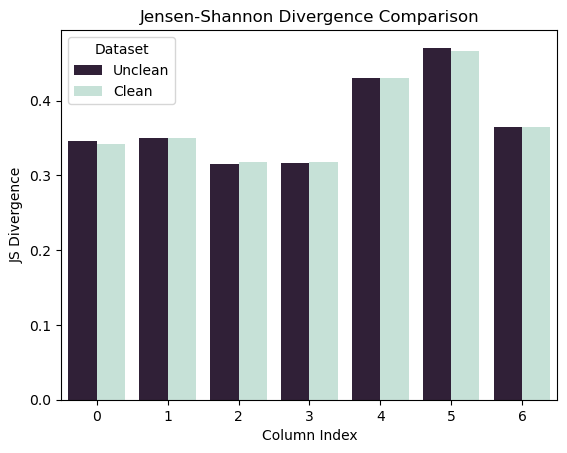

In [16]:
members_unclean = pd.DataFrame()
members_clean = pd.DataFrame()
privateDataset_Path = 'createdSets/Task 1/train/'
setsToExclude = []
for i in range(10):
    members_unclean = pd.concat([members_unclean, npzPrivateToDataframe(privateDataset_Path + str(i+1) + '.npz')])
    if i not in setsToExclude:
        members_clean = pd.concat([members_clean, npzPrivateToDataframe(privateDataset_Path + str(i+1) + '.npz')])

JS_Clean = getJensenShannonDivergences(syntheticData_Task1, members_clean)
JS_Unclean = getJensenShannonDivergences(syntheticData_Task1, members_unclean)
plotDoubleHistogram(JS_Unclean, JS_Clean, title="Jensen-Shannon Divergence Comparison", df1label="Unclean", df2label="Clean")

## Non-Member part

In [5]:
nonMembers = pd.DataFrame()

allNonMembers = pd.concat([publicData_Tasks12, members_clean, members_clean]).drop_duplicates(keep=False)

while len(nonMembers) < len(members_clean):
    rowToAdd = publicData_Tasks12.sample()
    nonMembers = pd.concat([nonMembers, rowToAdd])

,0,1,2,3,4,5,6
360883,0.218953,0.526183,0.385720,0.000000,0.000000,0.000000,0.424798
679508,0.752697,0.565125,0.624129,0.715225,0.743969,0.245151,0.472953
573346,0.189815,0.441057,0.242439,0.000000,0.000000,0.000000,0.164677
342417,0.259940,0.457982,0.472377,0.407691,0.606143,0.728984,0.459119
619073,0.347294,0.360855,0.458785,0.646448,0.082641,0.000000,0.407555
...,...,...,...,...,...,...,...
299754,0.353931,0.330020,0.311004,0.085611,0.173344,0.449724,0.385023
843648,0.461755,0.791215,0.560307,0.797185,0.533835,0.247909,0.495697
820837,0.425814,0.468589,0.450830,0.344021,0.437527,0.080308,0.573580
831723,0.270486,0.294033,0.393494,0.408888,0.379644,0.332975,0.269410


## Concatening both parts

In [6]:
addMembershipToSubset(nonMembers, 0)
addMembershipToSubset(members_clean, 1)

trainingSet = pd.concat([members_clean, nonMembers])

# Visualisation

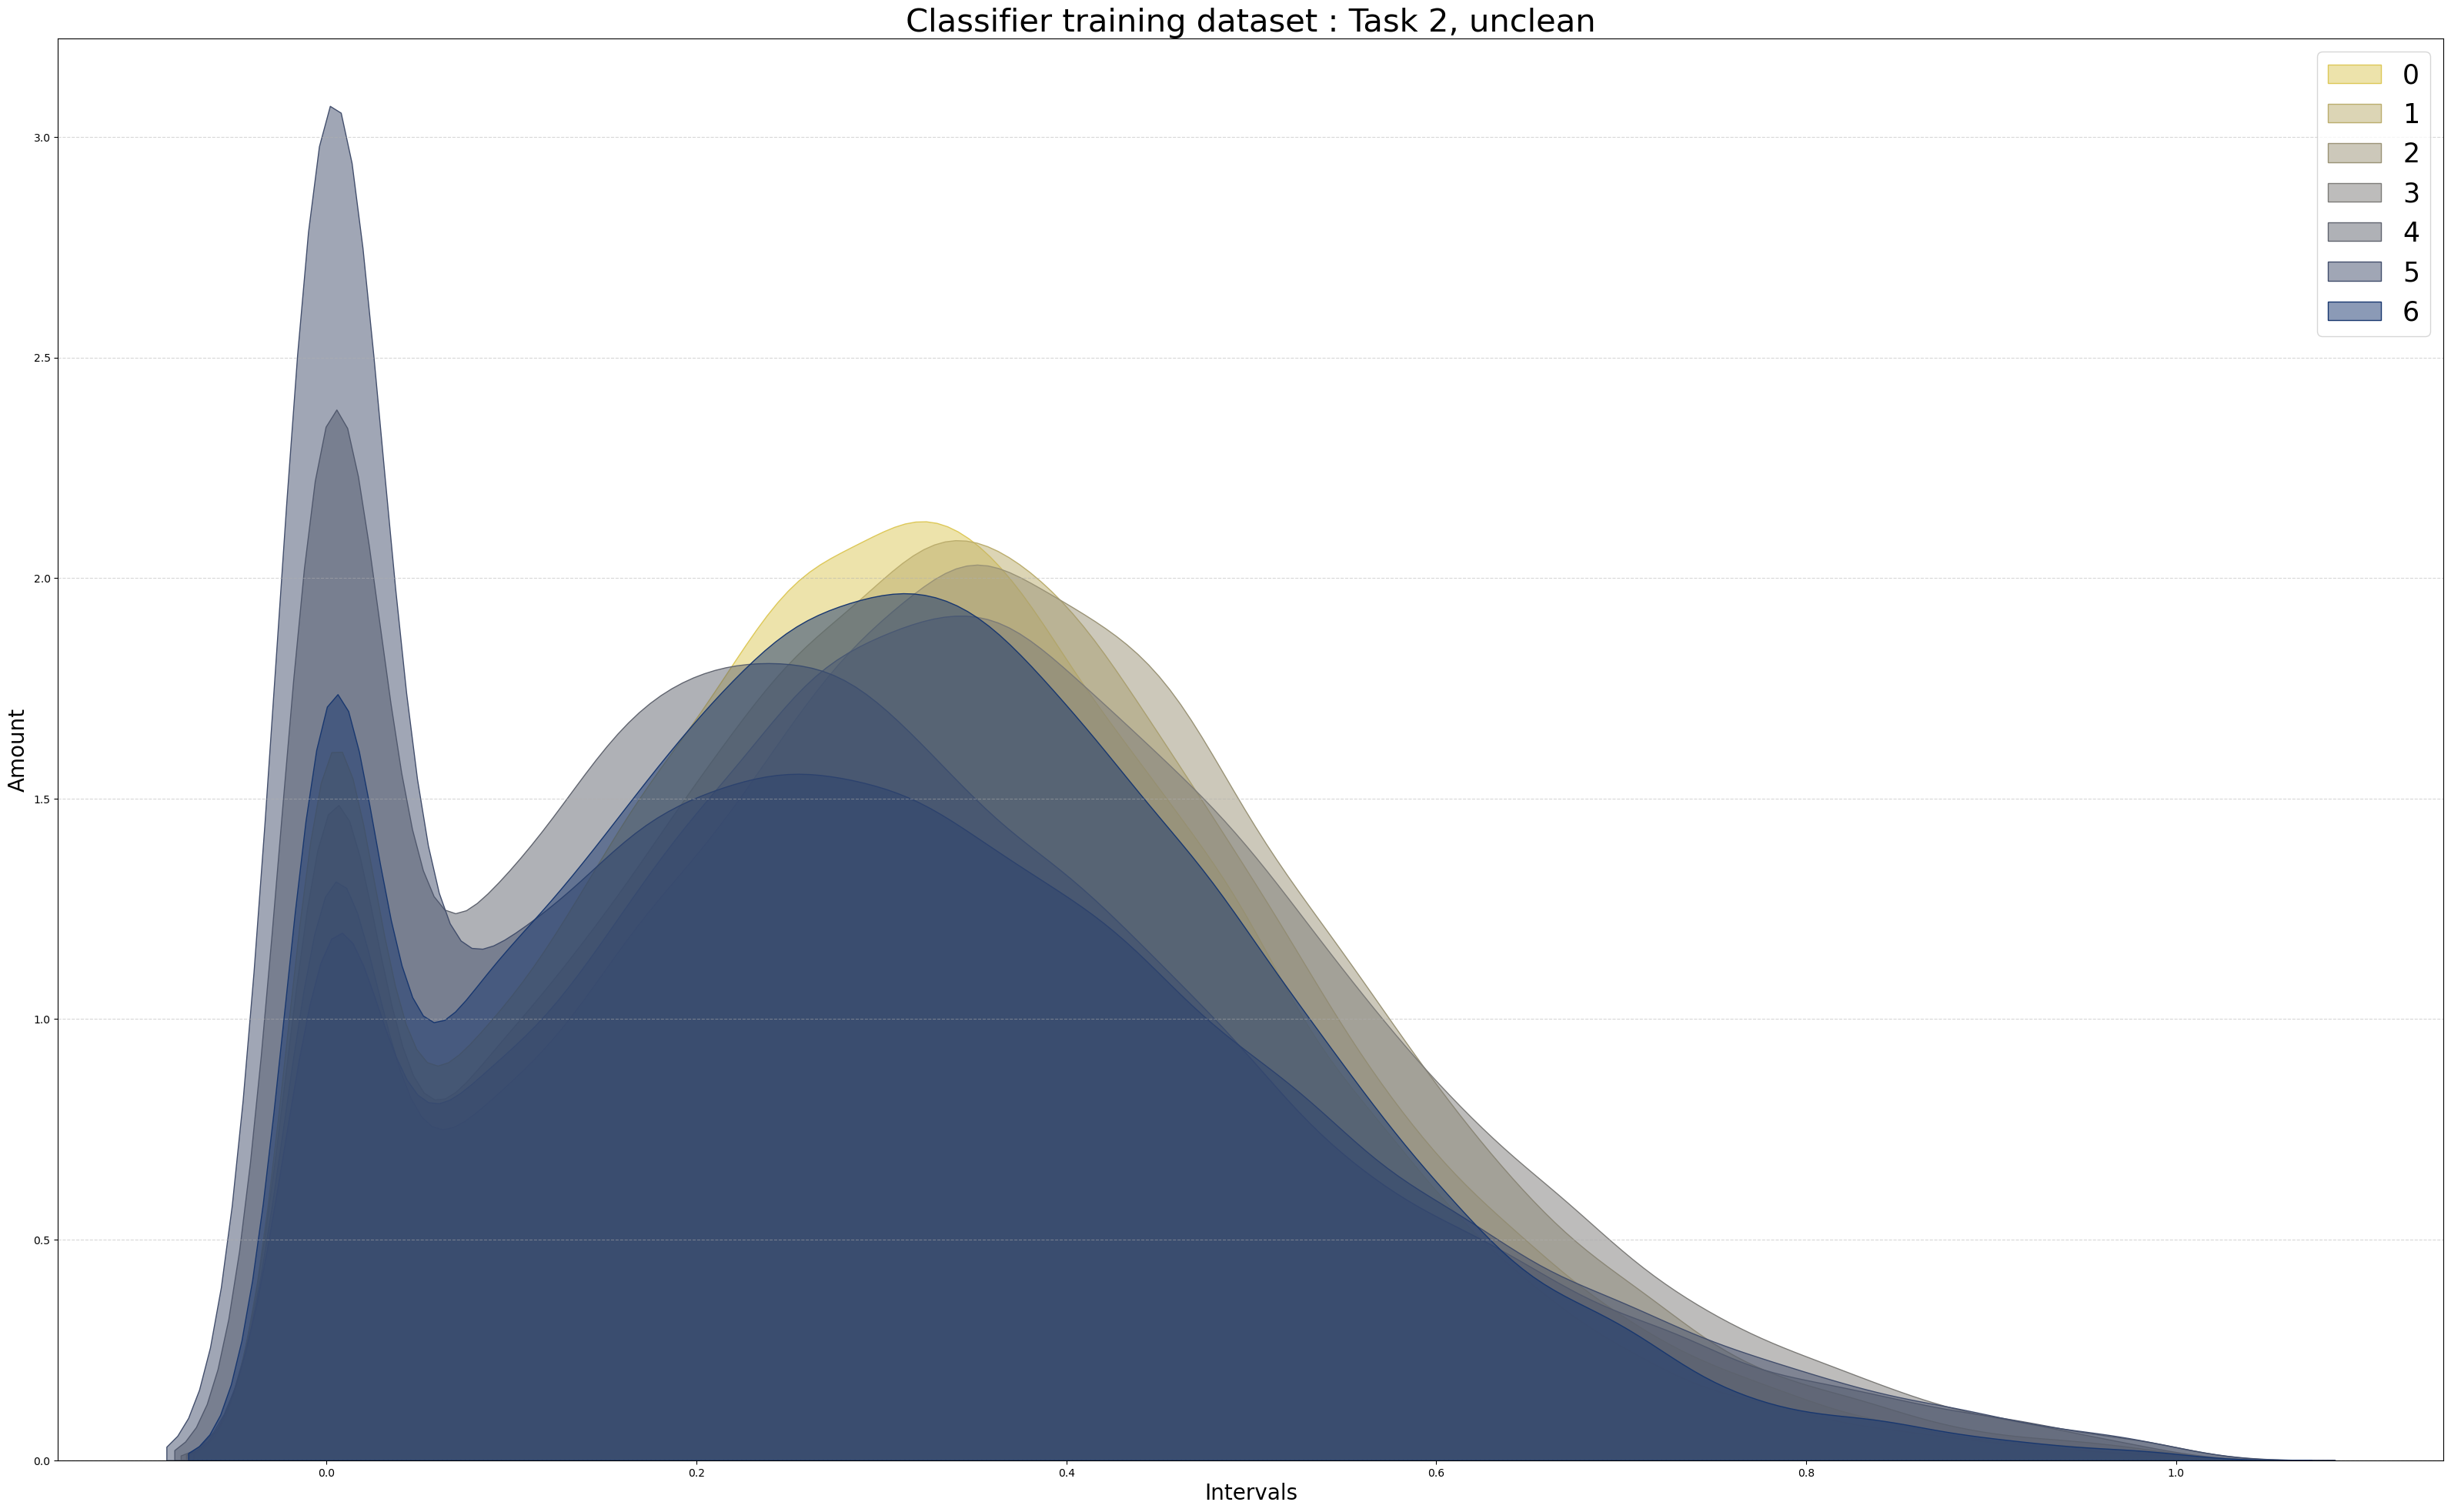

In [7]:
plotDistributionByDay(dataframe=trainingSet, palette=palette_TrainingDS, title = 'Classifier training dataset : Task 2, unclean')

### Save to File

In [8]:
import datetime as dt

now = dt.datetime.today().strftime('%Y-%m-%d-%H-%M-%S')
file_name = f"classifierTrainingSet_{now}.csv"
directory_path = f"/Users/thom/Personnel/Scolaire/MIA/snake2-beta-insa-main/data/teamExperiments/classifiersTrainingSets/"
file_path = f"{directory_path}{file_name}"
trainingSet.to_csv(file_path, index=False)